## Day 83 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [20]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/cancer_processed.csv')

In [21]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [22]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [23]:
cancer['target'] = np.where(cancer['diagnosis'] == 'M', 1, 0)
cancer['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

Split the data into train and test with 20% of the data in test.

In [24]:
# Answer below
X = cancer.drop(['target', 'diagnosis'], 1)
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scale all other variables using the standard scaler.

In [25]:
# Answer below:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [26]:
# Answer below
def build_model(opt='adam'):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()
  return model

Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9.

In [27]:
# Answer below:
sgd = SGD(lr=0.05, momentum=0.9)

Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

In [28]:
# Answer below:
sgd_model = build_model(sgd)
history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=100, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 49ms/step - loss: 15706391906.2283 - accuracy: 0.4796 - val_loss: 50.6110 - val_accuracy: 0.6316
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 36.7411 - accuracy: 0.6153 - val_loss: 0.6753 - val_accuracy: 0.6316
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6757 - accuracy: 0.6156 - val_loss: 0.6657 - val_accuracy: 0.6316
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6716 - accuracy: 0.6042 - val_loss: 0.6598 - val_accuracy: 0.6316
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6656 - accuracy: 0.6157 - val_loss: 0.6581 - val_accuracy: 0.6316
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6598 - accuracy: 0.6285 - val_loss: 0.6583 - val_accuracy: 0.6316
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6611 - accuracy: 0.6271 - val_loss: 0.6585 - val_accuracy: 0.6316
Epoch 8/20

In [29]:
sgd_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6316


[0.6582157611846924, 0.6315789222717285]

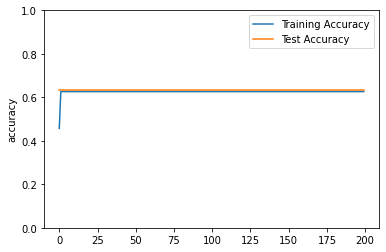

In [30]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

Define the RMSprop optimizer with a learning rate of 0.05.

In [31]:
# Answer below:
rms = RMSprop(learning_rate=0.05)

Compile and fit the model using the optimizer defined above. What do you notice about the accuracy?

In [32]:
# Answer below:
rms_model = build_model(rms)
history = rms_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=100, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 53ms/step - loss: 513.6250 - accuracy: 0.4788 - val_loss: 59.3297 - val_accuracy: 0.3684
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 25.2940 - accuracy: 0.4430 - val_loss: 0.6664 - val_accuracy: 0.6316
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6662 - accuracy: 0.6287 - val_loss: 0.6635 - val_accuracy: 0.6316
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 0.6701 - accuracy: 0.6102 - val_loss: 0.6605 - val_accuracy: 0.6316
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6644 - accuracy: 0.6213 - val_loss: 0.6589 - val_accuracy: 0.6316
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6559 - accuracy: 0.6385 - val_loss: 0.6586 - val_accuracy: 0.6316
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6600 - accuracy: 0.6285 - val_loss: 0.6585 - val_accuracy: 0.6316
Epoch 8/200
5/5 

In [33]:
rms_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6316


[0.6581771969795227, 0.6315789222717285]

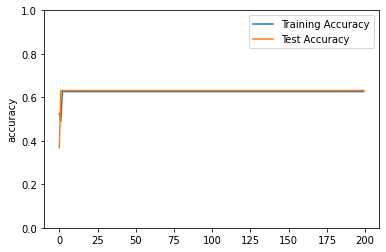

In [34]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

Define the Adam optimizer with learning rate 0.01

In [35]:
# Answer below:
adam = Adam(learning_rate=0.01)

Compile and fit the model using the optimizer defined above. How does the peformance differ with this optimizer?

In [36]:
# Answer below:
adam_model = build_model(adam)
history = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=100, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 70ms/step - loss: 20.0753 - accuracy: 0.4646 - val_loss: 23.3624 - val_accuracy: 0.6316
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 18.6831 - accuracy: 0.5559 - val_loss: 20.2214 - val_accuracy: 0.3684
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 13.5560 - accuracy: 0.4064 - val_loss: 8.5140 - val_accuracy: 0.6316
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 6.0073 - accuracy: 0.5198 - val_loss: 4.9943 - val_accuracy: 0.3684
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 3.1823 - accuracy: 0.4177 - val_loss: 2.1393 - val_accuracy: 0.6316
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 1.6415 - accuracy: 0.6485 - val_loss: 0.6904 - val_accuracy: 0.4386
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 0.6760 - accuracy: 0.5159 - val_loss: 0.5664 - val_accuracy: 0.6842
Epoch 8/200
5/5

In [37]:
adam_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9123


[0.18684616684913635, 0.9122806787490845]

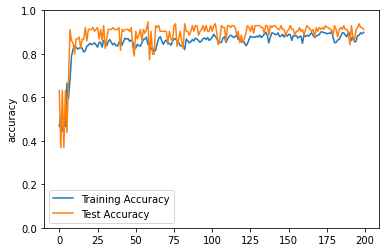

In [38]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

In [39]:
# Answer below:
adam = Adam(learning_rate=0.1)

In [40]:
adam_model = build_model(adam)
history = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=100, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 51ms/step - loss: 309.5890 - accuracy: 0.5098 - val_loss: 1.1498 - val_accuracy: 0.3684
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.8014 - accuracy: 0.5249 - val_loss: 0.6583 - val_accuracy: 0.6316
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.6563 - accuracy: 0.6371 - val_loss: 0.6597 - val_accuracy: 0.6316
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6674 - accuracy: 0.6199 - val_loss: 0.6585 - val_accuracy: 0.6316
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6655 - accuracy: 0.6206 - val_loss: 0.6581 - val_accuracy: 0.6316
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6725 - accuracy: 0.6121 - val_loss: 0.6595 - val_accuracy: 0.6316
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 0.6681 - accuracy: 0.6220 - val_loss: 0.6584 - val_accuracy: 0.6316
Epoch 8/200
5/5 [=

In [41]:
adam_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.6316


[0.6581193804740906, 0.6315789222717285]

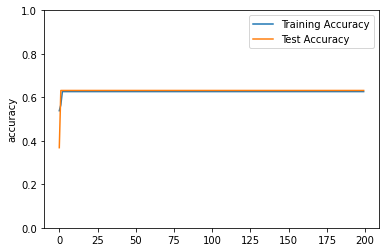

In [42]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [44]:
adam = Adam(learning_rate=0.1)

In [45]:
adam_model = build_model(adam)
history = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=100, epochs= 200, callbacks=[es])

Epoch 1/200
5/5 [==============================] - 1s 58ms/step - loss: 209.1712 - accuracy: 0.5673 - val_loss: 9.3214 - val_accuracy: 0.6316
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 7.4717 - accuracy: 0.5793 - val_loss: 0.7107 - val_accuracy: 0.3684
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 2.7672 - accuracy: 0.4286 - val_loss: 2.8690 - val_accuracy: 0.6316
Epoch 00003: early stopping


# Lecture Notes

In [50]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784 #28x28
output_dim = num_classes = 10 #number of classes 0-9
batch_size = 128
num_epochs = 10

X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)

In [51]:
def build_model(opt='adam'):
  model = Sequential()

  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(output_dim, activation='softmax'))
  model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])
  return model


In [52]:
sgd = SGD(lr=0.01, momentum=0.9)
sgd_model = build_model(sgd)
history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=batch_size, epochs= num_epochs)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.9040 - accuracy: 0.7359 - val_loss: 0.2461 - val_accuracy: 0.9285
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2395 - accuracy: 0.9308 - val_loss: 0.1806 - val_accuracy: 0.9463
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1745 - accuracy: 0.9496 - val_loss: 0.1418 - val_accuracy: 0.9574
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1334 - accuracy: 0.9620 - val_loss: 0.1328 - val_accuracy: 0.9610
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1152 - accuracy: 0.9667 - val_loss: 0.1129 - val_accuracy: 0.9680
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0934 - accuracy: 0.9728 - val_loss: 0.1033 - val_accuracy: 0.9702
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0814 - accuracy: 0.9766 - val_loss: 0.0931 - val_accuracy: 0.9721
Epoch 

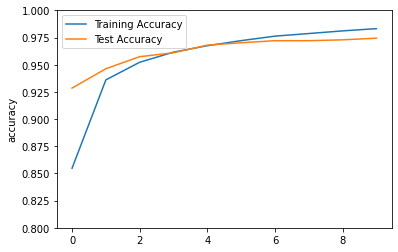

In [53]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0.8, 1])
plt.legend()
plt.show()

In [54]:
adagrad = Adagrad(learning_rate=0.01)
sgd_model = build_model(adagrad)
history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=batch_size, epochs= num_epochs)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2332 - accuracy: 0.6442 - val_loss: 0.3559 - val_accuracy: 0.9023
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3461 - accuracy: 0.9016 - val_loss: 0.2804 - val_accuracy: 0.9233
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2809 - accuracy: 0.9201 - val_loss: 0.2450 - val_accuracy: 0.9302
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2435 - accuracy: 0.9307 - val_loss: 0.2209 - val_accuracy: 0.9379
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2241 - accuracy: 0.9353 - val_loss: 0.2012 - val_accuracy: 0.9421
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2054 - accuracy: 0.9418 - val_loss: 0.1858 - val_accuracy: 0.9458
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1850 - accuracy: 0.9483 - val_loss: 0.1775 - val_accuracy: 0.9480
Epoch 

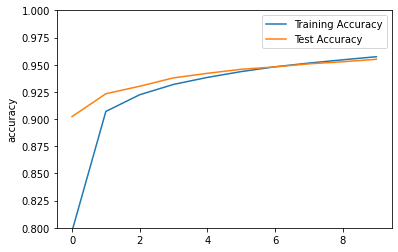

In [55]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0.8, 1])
plt.legend()
plt.show()

In [56]:
rms = RMSprop(learning_rate=0.01)
sgd_model = build_model(rms)
history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=batch_size, epochs= num_epochs)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.5674 - accuracy: 0.8283 - val_loss: 0.1635 - val_accuracy: 0.9532
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1500 - accuracy: 0.9571 - val_loss: 0.1595 - val_accuracy: 0.9546
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1237 - accuracy: 0.9660 - val_loss: 0.1572 - val_accuracy: 0.9613
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1209 - accuracy: 0.9683 - val_loss: 0.1881 - val_accuracy: 0.9652
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1143 - accuracy: 0.9715 - val_loss: 0.1722 - val_accuracy: 0.9663
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1115 - accuracy: 0.9732 - val_loss: 0.1822 - val_accuracy: 0.9667
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1053 - accuracy: 0.9746 - val_loss: 0.2187 - val_accuracy: 0.9638
Epoch 

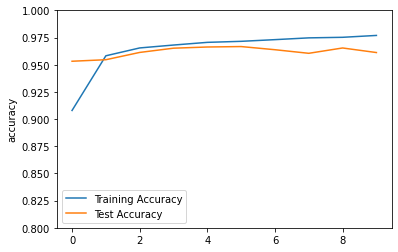

In [57]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0.8, 1])
plt.legend()
plt.show()

In [58]:
adam = Adam(learning_rate=0.01)
sgd_model = build_model(adam)
history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=batch_size, epochs= num_epochs)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4216 - accuracy: 0.8697 - val_loss: 0.1407 - val_accuracy: 0.9577
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1191 - accuracy: 0.9633 - val_loss: 0.1218 - val_accuracy: 0.9646
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0970 - accuracy: 0.9694 - val_loss: 0.1211 - val_accuracy: 0.9683
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0776 - accuracy: 0.9762 - val_loss: 0.1348 - val_accuracy: 0.9633
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.1148 - val_accuracy: 0.9688
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.1260 - val_accuracy: 0.9692
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.1437 - val_accuracy: 0.9669
Epoch 

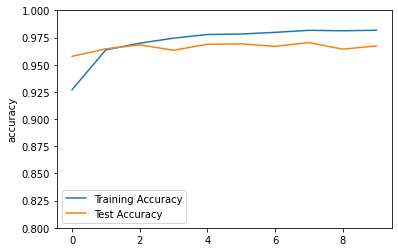

In [59]:
df = pd.DataFrame(history.history)
sns.lineplot(y=df['accuracy'], x=df.index, label='Training Accuracy')
sns.lineplot(y=df['val_accuracy'], x=df.index, label='Test Accuracy')
plt.ylim([0.8, 1])
plt.legend()
plt.show()